<a href="https://colab.research.google.com/github/dishitk/machine-learning/blob/master/Machine_Learning_Project_1_Digit_Recognizer_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/My Drive/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
df.shape
df.sample(frac=1)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
4969,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3642,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38179,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,16,185,218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13201,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24339,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12459,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8930,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20465,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20251,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [92]:
X_mnist = df.drop('label',1).values.astype('float32')
X_mnist.shape
X_mnist /= 255.0
Y_mnist = df['label'].values

In [93]:
Y_mnist.shape

(42000,)

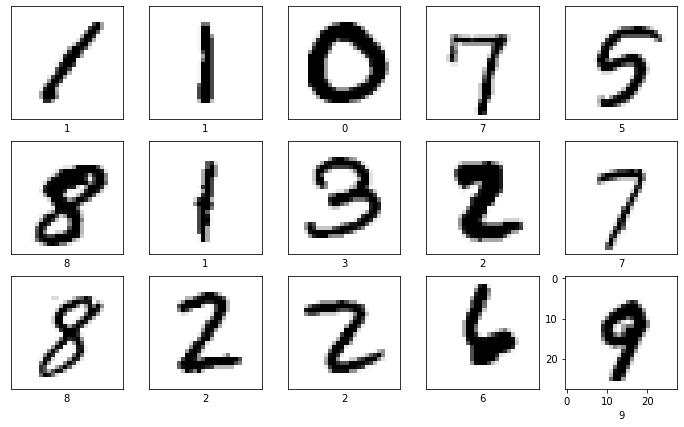

In [104]:
X = X_mnist.reshape(X_mnist.shape[0], 28, 28)
plt.figure(figsize=(12,12))
for x in range(15):
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.subplot(5,5,x+1)
    plt.imshow(X[x*2], cmap=plt.cm.binary)
    plt.xlabel(Y_mnist[x*2])
plt.show()

In [95]:
from sklearn.model_selection import train_test_split
from operator import itemgetter, attrgetter
X_mnist = X_mnist[:3000]
Y_mnist = Y_mnist[:3000]
X_train, X_test, Y_train, Y_test = train_test_split(X_mnist, Y_mnist,test_size=0.2,random_state=1)

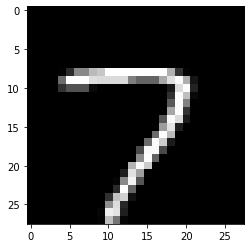

In [96]:
plt.imshow((X_train[10].reshape(28, 28)), cmap = 'gray')
plt.show()

In [97]:
def euclidean_distance(data_1, data_2):
	distance = np.sum(np.square(np.subtract(data_1,data_2)))
	return np.sqrt(distance)

In [98]:
def get_neighbors(train, test_data, neighbors_count):
  distances_euclidean_metric = []
  for train_data_row_index in range(len(train)):
    distance = euclidean_distance(test_data, train[train_data_row_index])
    distances_euclidean_metric.append((train_data_row_index, distance))
  distances_euclidean_metric.sort(key=lambda d: d[1])
  neighbors = []
  for i in range(neighbors_count):
    neighbors.append(distances_euclidean_metric[i][0]);
  return neighbors

In [99]:
def k_nearest_neighbors(train, test, num_neighbors):
  neighbors = get_neighbors(train, test, num_neighbors)
  output_values = [Y_train[row] for row in neighbors]
  prediction = max(set(output_values), key=output_values.count)
  return prediction

In [100]:
def accuracy_predictions(Y_hat, Y_test):
  prediction_true = 0
  for i in range(len(Y_hat)):
    if Y_hat[i]==Y_test[i]:
      prediction_true += 1
  return (prediction_true/len(Y_hat))*100

In [101]:
import time
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns
def confusion_accuracy(neighbors_count):
  start = time.time()
  y_hat = []
  for row in X_test:
    z = k_nearest_neighbors(X_train,row,neighbors_count)
    y_hat.append(z)

  model_accuracy = accuracy_predictions(y_hat,Y_test)
  end = time.time()
  print("Model Accuracy:", model_accuracy)
  print(f"Wall Clock Runtime:  {end - start}")
  total_confusion_matrix = confusion_matrix(Y_test, y_hat)
  false_negative = (np.sum(total_confusion_matrix[2])-total_confusion_matrix[2][2])
  false_positive = (np.sum(total_confusion_matrix[:,2])-total_confusion_matrix[2][2])
  truePN = (np.sum(np.diagonal(total_confusion_matrix)))

  accuracy = truePN/(truePN + false_positive+false_negative)
  print(f"Accuracy of prediction of 2 with respect to K={neighbors_count} : {accuracy*100}")

Model Accuracy: 91.66666666666666
Runtime of the program is 14.385448217391968


Text(0.5, 15.0, 'Predicted label')

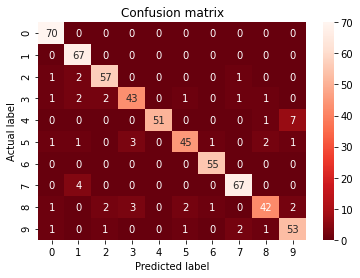

In [102]:
y_hat = []
for row in X_test:
  z = k_nearest_neighbors(X_train,row,3)
  y_hat.append(z)
model_accuracy = accuracy_predictions(y_hat,Y_test)
print("Model Accuracy:", model_accuracy)
print(f"Runtime of the program is {end - start}")
total_confusion_matrix = confusion_matrix(Y_test, y_hat)
p = sns.heatmap(pd.DataFrame(total_confusion_matrix), annot=True, cmap="Reds_r" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [103]:
for i in range(3,19,2):
  confusion_accuracy(i)
  print("\n")

Model Accuracy: 91.66666666666666
Wall Clock Runtime:  14.797988414764404
Accuracy of 2 with respect to K=3 : 98.38998211091234


Model Accuracy: 91.66666666666666
Wall Clock Runtime:  14.228440046310425
Accuracy of 2 with respect to K=5 : 98.74326750448833


Model Accuracy: 90.66666666666666
Wall Clock Runtime:  14.457032680511475
Accuracy of 2 with respect to K=7 : 98.55072463768117


Model Accuracy: 89.0
Wall Clock Runtime:  14.606079816818237
Accuracy of 2 with respect to K=9 : 98.16176470588235


Model Accuracy: 89.33333333333333
Wall Clock Runtime:  14.59651231765747
Accuracy of 2 with respect to K=11 : 98.34862385321101


Model Accuracy: 89.16666666666667
Wall Clock Runtime:  14.533421277999878
Accuracy of 2 with respect to K=13 : 98.34558823529412


Model Accuracy: 88.5
Wall Clock Runtime:  14.681512117385864
Accuracy of 2 with respect to K=15 : 97.97047970479706


Model Accuracy: 88.66666666666667
Wall Clock Runtime:  14.405170917510986
Accuracy of 2 with respect to K=17 : 98.